In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS as colors
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

### Let's first import the data and see what it looks like

In [2]:
orig_df = pd.read_csv(r"USvideos.csv")
orig_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [3]:
print("Shape of the Data Frame -", orig_df.shape)

Shape of the Data Frame - (40949, 16)


In [4]:
print("Number of Unique Values in each Column -\n")
print(orig_df.nunique())

Number of Unique Values in each Column -

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [5]:
print(orig_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# We'll observe the Trends in Views, Likes, Dislikes and Comments
### Extract the Videos which had Ratings and Comments enabled

In [6]:
df = orig_df.loc[(orig_df["ratings_disabled"] == False) & (orig_df["comments_disabled"] == False) & (orig_df["video_error_or_removed"] == False)]
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### Calculate the Mean and Standard Deviation of the Four Parameters

In [7]:
print("Views - \nMean, Standard Deviation = ", np.mean(df["views"]), ", ", np.std(df["views"]), sep="", end="\n\n")
print("Likes - \nMean, Standard Deviation = ", np.mean(df["likes"]), ", ", np.std(df["likes"]), sep="", end="\n\n")
print("Dislikes - \nMean, Standard Deviation = ", np.mean(df["dislikes"]), ", ", np.std(df["dislikes"]), sep="", end="\n\n")
print("Comments - \nMean, Standard Deviation = ", np.mean(df["comment_count"]), ", ", np.std(df["comment_count"]), sep="")

Views - 
Mean, Standard Deviation = 2360888.6037285607, 7416373.076539632

Likes - 
Mean, Standard Deviation = 75228.70139199603, 230751.53438173304

Dislikes - 
Mean, Standard Deviation = 3734.662813820532, 29272.43532201256

Comments - 
Mean, Standard Deviation = 8594.569077802635, 37746.34444537184


### Plot the Four Parameters in a Histogram

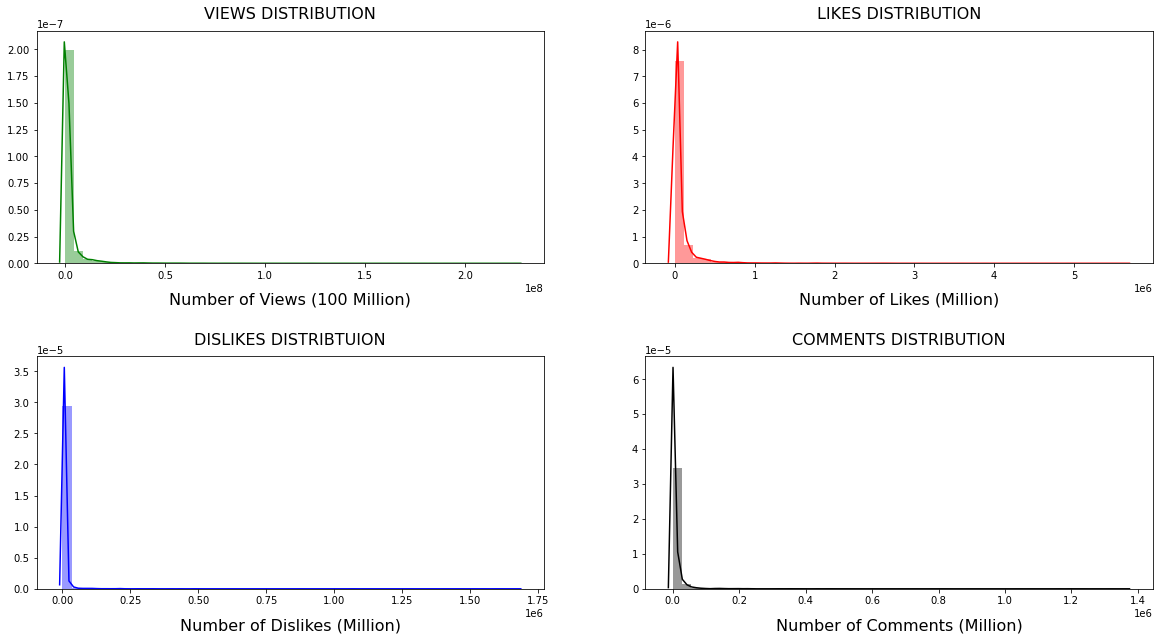

In [8]:
# Viewing the distribution of likes, dislikes, views and comments

plt.figure(figsize=(20,10))

plt.subplot(221)
views = sns.distplot(df["views"], color="green")
views.set_title("VIEWS DISTRIBUTION", fontsize=16, pad=12)
views.set_xlabel("Number of Views (100 Million)", fontsize=16, labelpad=12)

plt.subplot(222)
likes = sns.distplot(df["likes"], color="red")
likes.set_title("LIKES DISTRIBUTION", fontsize=16, pad=12)
likes.set_xlabel("Number of Likes (Million)", fontsize=16, labelpad=12)

plt.subplot(223)
dislikes = sns.distplot(df["dislikes"], color="blue")
dislikes.set_title("DISLIKES DISTRIBTUION", fontsize=16, pad=12)
dislikes.set_xlabel("Number of Dislikes (Million)", fontsize=16, labelpad=12)

plt.subplot(224)
comments = sns.distplot(df["comment_count"], color="black")
comments.set_title("COMMENTS DISTRIBUTION", fontsize=16, pad=12)
comments.set_xlabel("Number of Comments (Million)", fontsize=16, labelpad=12)

plt.subplots_adjust(hspace=0.4, top=0.9)

### Very little can be deduced from the plots, except that there exists a very strong peak in the range 0 - 5 Million for Views, 0 - 100 Thousand for Likes, 0 - 25 Thousand for Dislikes and 0 - 20 Thousand for Comments.
## Observe the Distribution of the Log of the Four Parameters
### Store the log values in another column of the data frame and calculate the mean and standard deviation of each of the values.

In [9]:
df["log_views"] = np.log(df["views"]+1)
views_mean, views_std = np.mean(df["log_views"]), np.std(df["log_views"])
print("Log of Views - \nMean, Standard Deviation = ", views_mean, ", ", views_std, sep="", end="\n\n")

df["log_likes"] = np.log(df["likes"]+1)
likes_mean, likes_std = np.mean(df["log_likes"]), np.std(df["log_likes"])
print("Log of Likes - \nMean, Standard Deviation = ", likes_mean, ", ", likes_std, sep="", end="\n\n")

df["log_dislikes"] = np.log(df["dislikes"]+1)
dislikes_mean, dislikes_std = np.mean(df["log_dislikes"]), np.std(df["log_dislikes"])
print("Log of Dislikes - \nMean, Standard Deviation = ", dislikes_mean, ", ", dislikes_std, sep="", end="\n\n")

df["log_comment_count"] = np.log(df["comment_count"]+1)
comments_mean, comments_std = np.mean(df["log_comment_count"]), np.std(df["log_comment_count"])
print("Log of Comments - \nMean, Standard Deviation = ", comments_mean, ", ", comments_std, sep="")

Log of Views - 
Mean, Standard Deviation = 13.344458531653828, 1.6995674434149888

Log of Likes - 
Mean, Standard Deviation = 9.654926056452444, 2.015546114505783

Log of Dislikes - 
Mean, Standard Deviation = 6.414757543862413, 1.870859674546399

Log of Comments - 
Mean, Standard Deviation = 7.507364897002516, 1.848186091134158


### Plot these Log values along with the corresponding Normal Distribution Curve

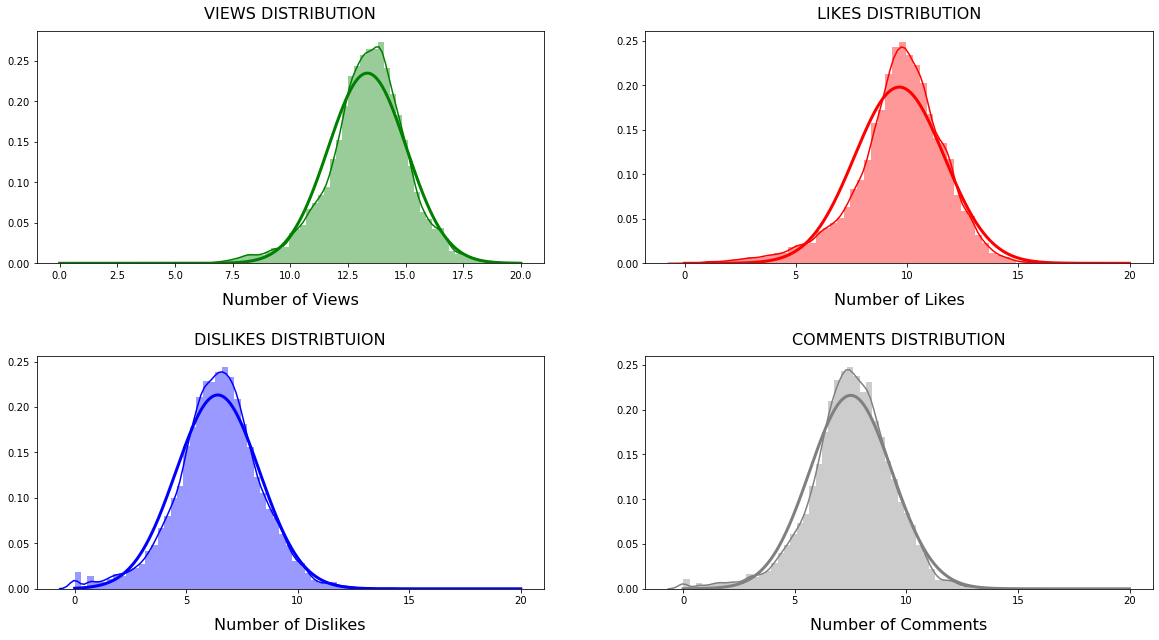

In [10]:
# Viewing the distribution of log of likes, dislikes, views and comments

x = np.linspace(0,20,1000)
plt.figure(figsize=(20,10))

ax = plt.subplot(221)
ax.plot(x, stats.norm.pdf(x, views_mean, views_std), linewidth=3, color="green")
views = sns.distplot(df["log_views"], color="green")
views.set_title("VIEWS DISTRIBUTION", fontsize=16, pad=12)
views.set_xlabel("Number of Views", fontsize=16, labelpad=12)

ax = plt.subplot(222)
ax.plot(x, stats.norm.pdf(x, likes_mean, likes_std), linewidth=3, color="red")
likes = sns.distplot(df["log_likes"], color="red")
likes.set_title("LIKES DISTRIBUTION", fontsize=16, pad=12)
likes.set_xlabel("Number of Likes", fontsize=16, labelpad=12)

ax = plt.subplot(223)
ax.plot(x, stats.norm.pdf(x, dislikes_mean, dislikes_std), linewidth=3, color="blue")
dislikes = sns.distplot(df["log_dislikes"], color="blue")
dislikes.set_title("DISLIKES DISTRIBTUION", fontsize=16, pad=12)
dislikes.set_xlabel("Number of Dislikes", fontsize=16, labelpad=12)

ax = plt.subplot(224)
ax.plot(x, stats.norm.pdf(x, comments_mean, comments_std), linewidth=3, color="grey")
comments = sns.distplot(df["log_comment_count"], color="grey")
comments.set_title("COMMENTS DISTRIBUTION", fontsize=16, pad=12)
comments.set_xlabel("Number of Comments", fontsize=16, labelpad=12)

plt.subplots_adjust(hspace=0.4, top=0.9)

### We can very easily see that the log curves are well approximated by the corresponding normal distribution. Hence, these variables follow log-normal distribution. This can be used to extract the mathematical properties of the varaibles.

# Now we'll Explore how the Distribution of the Four Parameters varies with the Category of the Video

In [11]:
df["category_id"].value_counts()

24    9749
10    6447
26    4135
23    3455
22    3130
25    2313
28    2310
1     2301
17    2140
27    1644
15     916
20     809
19     402
2      369
43      57
29      53
Name: category_id, dtype: int64

### Create a New Column for the Category Names (category ID contains minimal information about the category)

In [12]:
to_replace = [1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,43]
values = ["Film and Animation", "Cars and Vehicles", "Music", "Pets and Animals", "Sport", 
          "Travel and Events", "Gaming", "People and Blogs", "Comedy", "Entertainment", "News and Politics", 
          "How to and Style", "Education", "Science and Technology", "Non Profits and Activism", "Shows"]

# List from https://gist.github.com/dgp/1b24bf2961521bd75d6c

df["category_name"] = df["category_id"].replace(to_replace=to_replace, value=values)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,log_views,log_likes,log_dislikes,log_comment_count,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,13.525659,10.960027,7.995307,9.677528,People and Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",14.698775,11.484382,8.723719,9.449672,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,14.975981,11.891595,8.582981,9.009692,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,12.745978,9.227492,6.502790,7.671827,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,14.555413,11.792343,7.595890,9.771041,Entertainment


### Plot the Number of Videos in each Category with a Barplot

<BarContainer object of 16 artists>

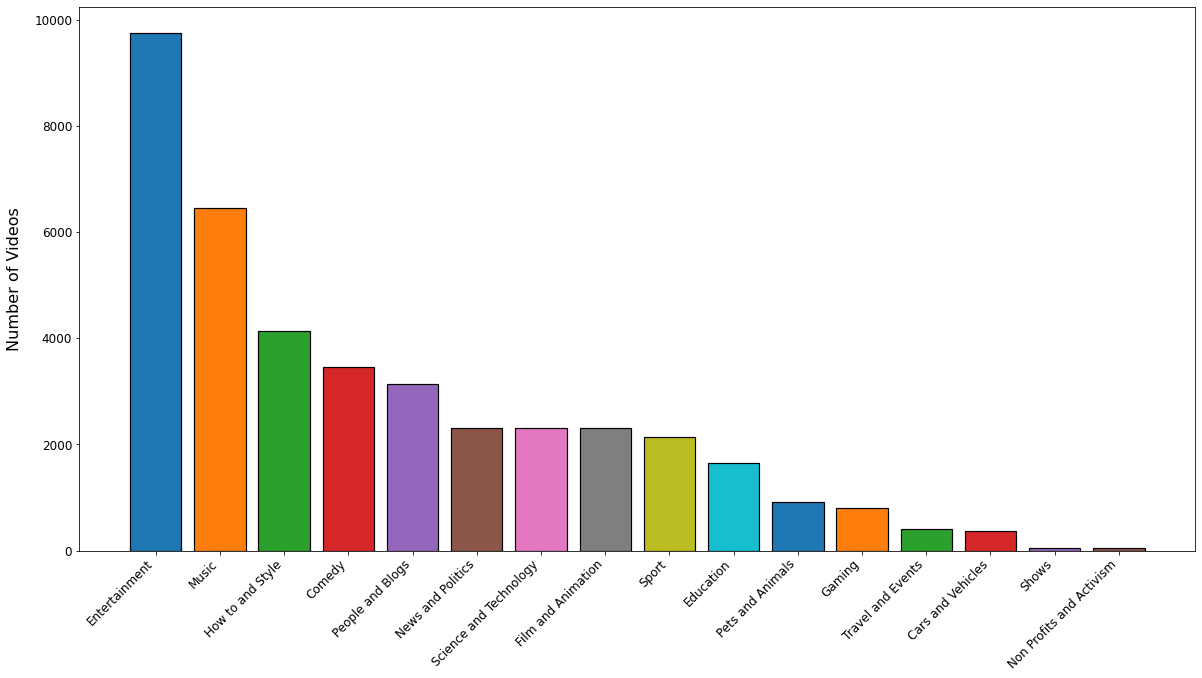

In [13]:
# Bar Plot with Categories

categories = df["category_name"].value_counts()
x, y = categories.index, categories.values

plt.figure(figsize=(20,10))
plt.xticks(rotation=45, fontsize=12, ha="right")
plt.yticks(fontsize=12)
plt.ylabel("Number of Videos", fontsize=16, labelpad=12)
plt.bar(x, y, edgecolor="black", linewidth=1.2, color=list(colors))

## Plot the Distribution of each of the Four Parameters by Category using a Boxplot
### Distribution of Views by Category

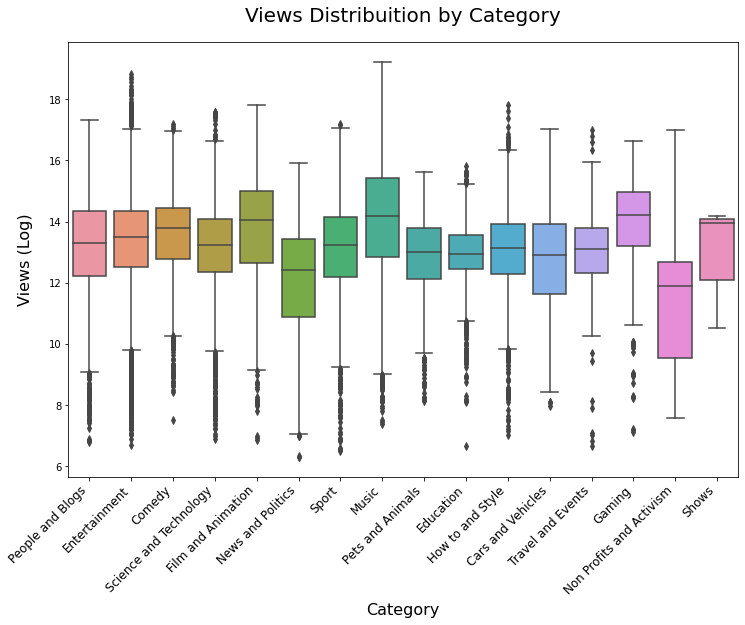

In [14]:
plt.figure(figsize=(12,8))

views = sns.boxplot(df.category_name, df.log_views)
views.set_title("Views Distribuition by Category", fontsize=20, pad=20)
views.set_xticklabels(labels=views.get_xticklabels(), rotation=45, fontsize=12, ha="right")
views.set_xlabel("Category", fontsize=16, labelpad=6)
views.set_ylabel("Views (Log)", fontsize=16, labelpad=16)
plt.show()

### It can be seen that music videos have highest average number of views, possibly because music is a more universal interest than other categories, and because music videos call for repeated views (everytime one wishes to listen to the song).
### Distribution of Likes by Category

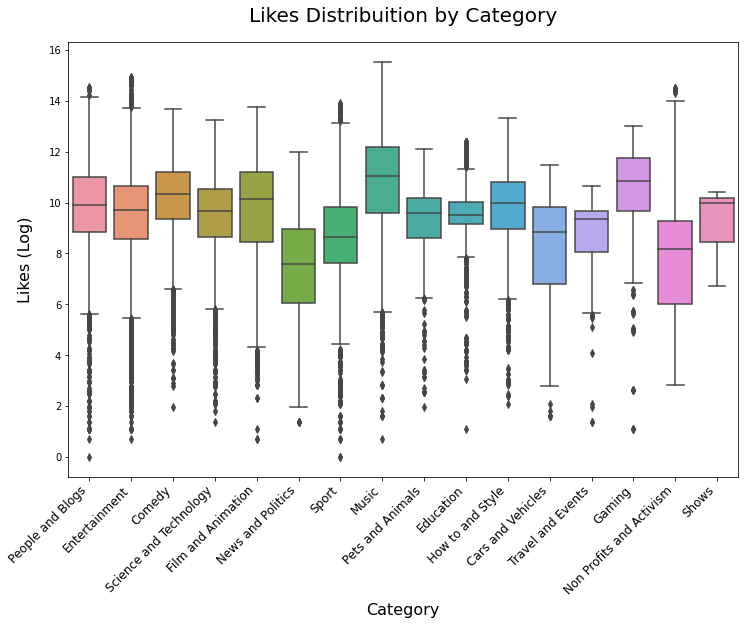

In [15]:
plt.figure(figsize=(12,8))

likes = sns.boxplot(df.category_name, df.log_likes)
likes.set_title("Likes Distribuition by Category", fontsize=20, pad=20)
likes.set_xticklabels(labels=likes.get_xticklabels(), rotation=45, fontsize=12, ha="right")
likes.set_xlabel("Category", fontsize=16, labelpad=6)
likes.set_ylabel("Likes (Log)", fontsize=16, labelpad=16)
plt.show()

### Music videos have the highest number of average likes, which can possibly be attributed to the highest number of average of views.

### Since the same category had the most number of views and likes, let's try and plot these two against each other to see if there exists any correlation between the two.

Slope of Regression Line = 1.056
Intercept of Regression Line = -4.433
Pearson Correlation Coefficient = 0.8901930510743449
Mean Absolute Error = 0.702
Mean Squared Error = 0.843


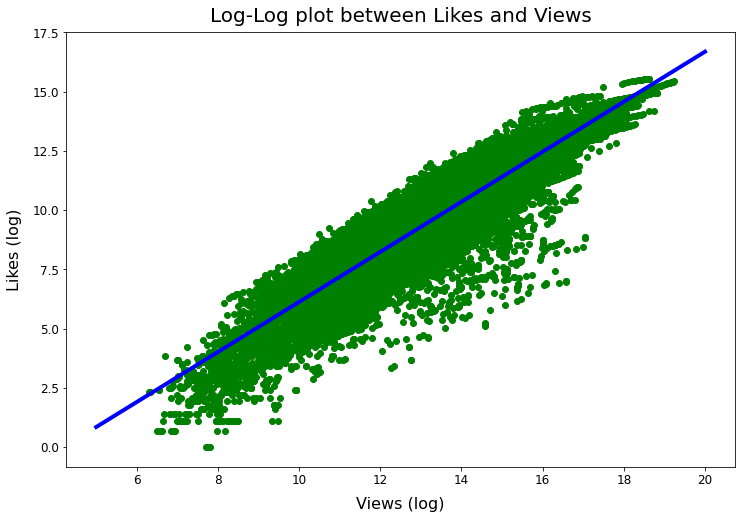

In [16]:
x = df["log_views"].values.reshape(-1,1)
y = df["log_likes"].values.reshape(-1,1)

plt.figure(figsize=(12,8))
plt.scatter(x, y, c="g")

regr = LR()
regr.fit(x, y)

lx = np.linspace(5,20,1000)
ly = np.squeeze(regr.coef_)*lx + np.squeeze(regr.intercept_)
plt.plot(lx, ly, "b", linewidth=4)

plt.title("Log-Log plot between Likes and Views", fontsize=20, pad=10)
plt.xlabel("Views (log)", fontsize=16, labelpad=10)
plt.ylabel("Likes (log)", fontsize=16, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

print("Slope of Regression Line = %.3f" % np.squeeze(regr.coef_))
print("Intercept of Regression Line = %.3f" % np.squeeze(regr.intercept_))
print("Pearson Correlation Coefficient =", np.squeeze(regr.coef_)*views_std/likes_std)
print("Mean Absolute Error = %.3f" % mae(y, np.squeeze(regr.coef_)*x + np.squeeze(regr.intercept_)))
print("Mean Squared Error = %.3f" % mse(y, np.squeeze(regr.coef_)*x + np.squeeze(regr.intercept_)))

### The correlation coefficient is 0.89, which means that the number of views and the number of likes are highly correlated.
### Distribution of Dislikes by Category

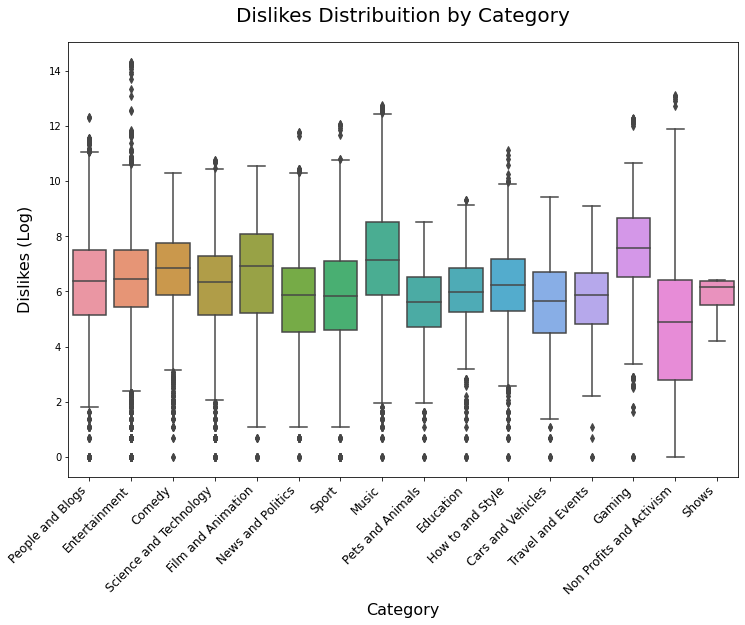

In [17]:
plt.figure(figsize=(12,8))

dislikes = sns.boxplot(df.category_name, df.log_dislikes)
dislikes.set_title("Dislikes Distribuition by Category", fontsize=20, pad=20)
dislikes.set_xticklabels(labels=views.get_xticklabels(), rotation=45, fontsize=12, ha="right")
dislikes.set_xlabel("Category", fontsize=16, labelpad=6)
dislikes.set_ylabel("Dislikes (Log)", fontsize=16, labelpad=16)
plt.show()

### Here we can see that gaming videos have the highest number of average dislikes.

### Distribution of Comments by Category

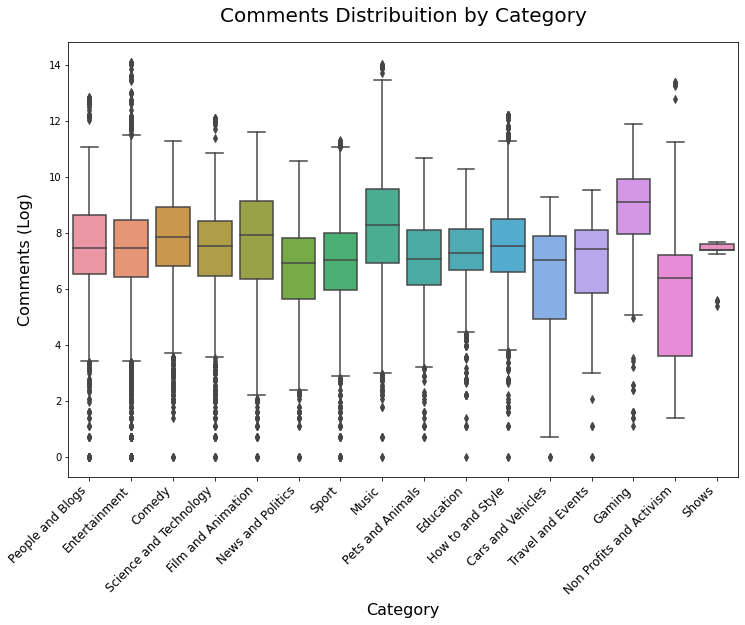

In [18]:
plt.figure(figsize=(12,8))

comments = sns.boxplot(df.category_name, df.log_comment_count)
comments.set_title("Comments Distribuition by Category", fontsize=20, pad=20)
comments.set_xticklabels(labels=comments.get_xticklabels(), rotation=45, fontsize=12, ha="right")
comments.set_xlabel("Category", fontsize=16, labelpad=6)
comments.set_ylabel("Comments (Log)", fontsize=16, labelpad=16)
plt.show()

### Gaming videos have the highest number of comments, possibly because these videos are extensively discussed by gamers.
### Since the same category had the most number of views and likes, let's try and plot these two against each other to see if there exists any correlation between the two.

Slope of Regression Line = 0.868
Intercept of Regression Line = 1.937
Pearson Correlation Coefficient = 0.8790150890094006
Mean Absolute Error = 0.674
Mean Squared Error = 0.777


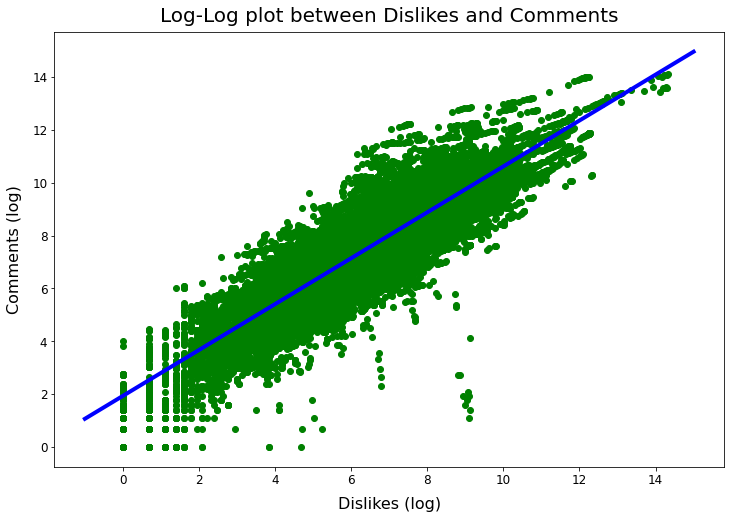

In [19]:
x = df["log_dislikes"].values.reshape(-1,1)
y = df["log_comment_count"].values.reshape(-1,1)

plt.figure(figsize=(12,8))
plt.scatter(x, y, c="g")

regr = LR()
regr.fit(x, y)

lx = np.linspace(-1,15,1000)
ly = np.squeeze(regr.coef_)*lx + np.squeeze(regr.intercept_)
plt.plot(lx, ly, "b", linewidth=4)

plt.title("Log-Log plot between Dislikes and Comments", fontsize=20, pad=10)
plt.xlabel("Dislikes (log)", fontsize=16, labelpad=10)
plt.ylabel("Comments (log)", fontsize=16, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

print("Slope of Regression Line = %.3f" % np.squeeze(regr.coef_))
print("Intercept of Regression Line = %.3f" % np.squeeze(regr.intercept_))
print("Pearson Correlation Coefficient =", np.squeeze(regr.coef_)*dislikes_std/comments_std)
print("Mean Absolute Error = %.3f" % mae(y, np.squeeze(regr.coef_)*x + np.squeeze(regr.intercept_)))
print("Mean Squared Error = %.3f" % mse(y, np.squeeze(regr.coef_)*x + np.squeeze(regr.intercept_)))

### The correlation coefficient is 0.88, which means that the number of comments and the number of dislikes are highly correlated. Perhaps, the viewers take their disliking towards the video to the comments.
# Let us now view the Distribution of the Four Parameters by Channel

In [20]:
dropCols = ["trending_date", "tags", "category_id", "publish_time", "thumbnail_link", "comments_disabled", "ratings_disabled", "video_error_or_removed", "description"]
df.drop(columns=dropCols, axis=1, inplace=True)
df.set_index("video_id", drop=True, inplace=True)
df.head()

,title,channel_title,views,likes,dislikes,comment_count,log_views,log_likes,log_dislikes,log_comment_count,category_name
video_id,,,,,,,,,,,
2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,748374,57527,2966,15954,13.525659,10.960027,7.995307,9.677528,People and Blogs
1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2418783,97185,6146,12703,14.698775,11.484382,8.723719,9.449672,Entertainment
5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,3191434,146033,5339,8181,14.975981,11.891595,8.582981,9.009692,Comedy
puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,343168,10172,666,2146,12.745978,9.227492,6.502790,7.671827,Entertainment
d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,2095731,132235,1989,17518,14.555413,11.792343,7.595890,9.771041,Entertainment


## Distribution of Number of Videos by Number of Channels

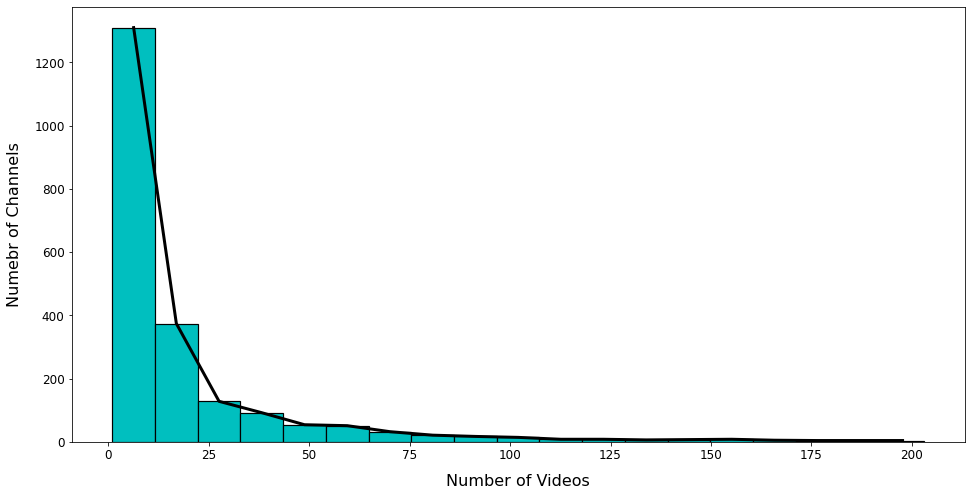

In [21]:
channels = df["channel_title"].value_counts(sort=True, ascending=False)
plt.figure(figsize=(16,8))
t = plt.hist(channels, edgecolor="black", linewidth=1.2, bins=19, color="c")
y, x = t[0], t[1]
x = [(x[idx]+x[idx+1])/2 for idx in range(len(x)-1)]

plt.xlabel("Number of Videos", fontsize=16, labelpad=12)
plt.ylabel("Numebr of Channels", fontsize=16, labelpad=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(x, y, linewidth=3, color="k")

## Channels with Total Number of Trending Videos in the 99th Percentile

<BarContainer object of 22 artists>

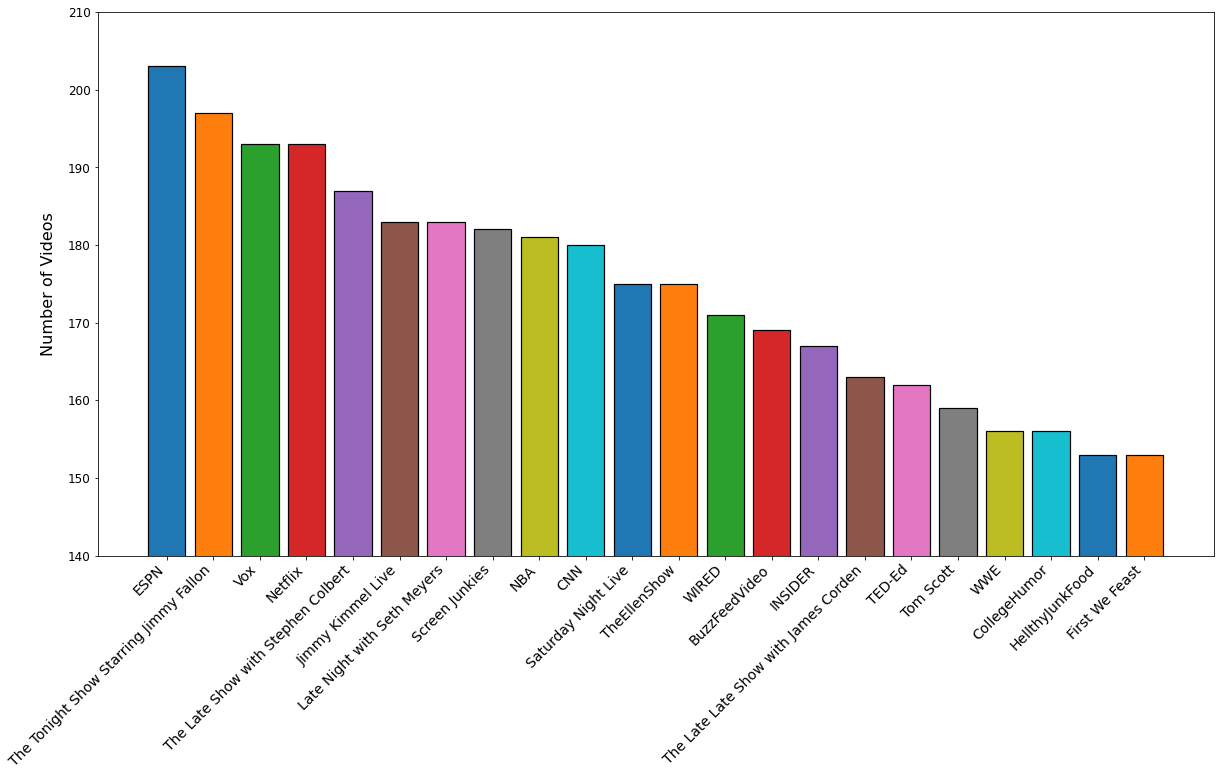

In [22]:
channels_with_most_trending_videos = channels[channels>np.percentile(channels,99)]
x, y = channels_with_most_trending_videos.index, channels_with_most_trending_videos.values

plt.figure(figsize=(20,10))
plt.xticks(rotation=45, fontsize=14, ha="right")
plt.yticks(fontsize=12)
plt.ylabel("Number of Videos", fontsize=16, labelpad=12)
plt.ylim(140,210)
plt.bar(x, y, edgecolor="black", linewidth=1.2, color=list(colors))

### ESPN and The Tonight Show Starring Jimmy Fallon have the highest number of videos in the trending list.
## Channels with the Highest Number of Average Views across all their Videos

<BarContainer object of 10 artists>

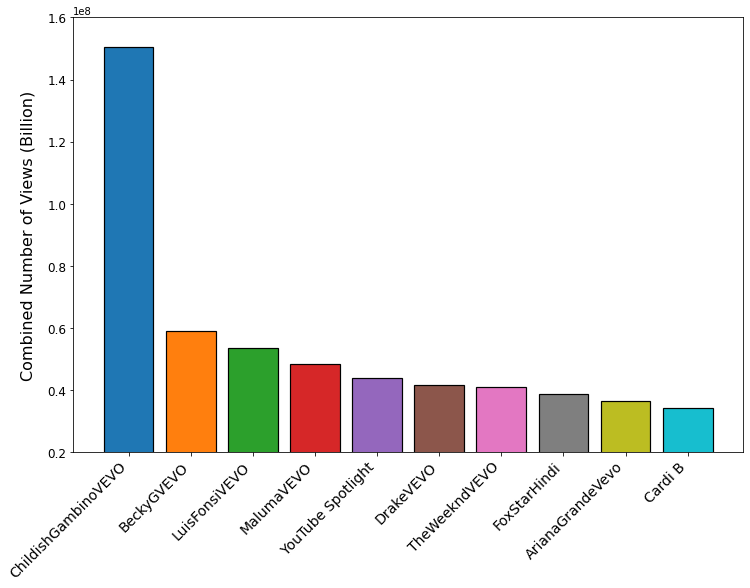

In [27]:
most_viewed = df["views"].groupby(df["channel_title"]).mean().sort_values(ascending=False)
x = most_viewed.index[:10]
y = most_viewed.values[:10]

plt.figure(figsize=(12,8))
plt.xticks(rotation=45, fontsize=14, ha="right")
plt.yticks(fontsize=12)
plt.ylabel("Combined Number of Views (Billion)", fontsize=16, labelpad=12)
plt.ylim(0.2*1e8, 1.6*1e8)
plt.bar(x, y, edgecolor="black", linewidth=1.2, color=list(colors))

### As can be seen from the above graph, ChildishGambinoVEVO has the highest number of average views.
## Channels with the Highest Number of Average Likes across all their Videos

<BarContainer object of 10 artists>

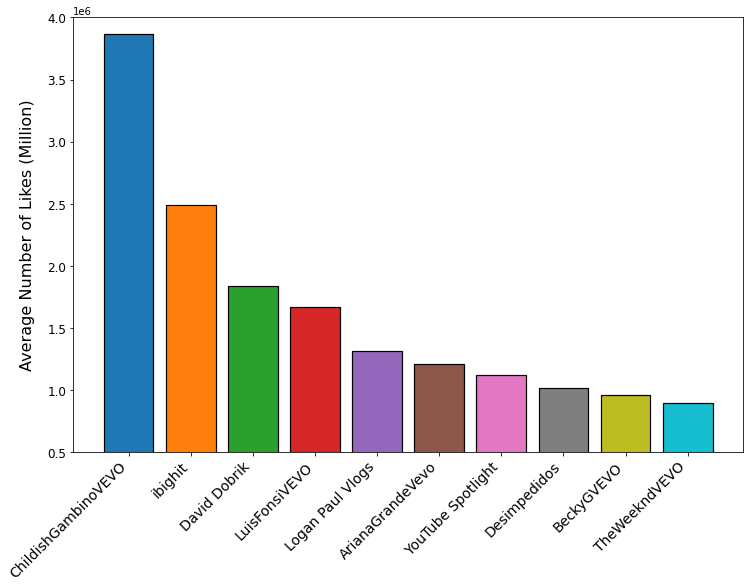

In [28]:
most_liked = df["likes"].groupby(df["channel_title"]).mean().sort_values(ascending=False)
x = most_liked.index[:10]
y = most_liked.values[:10]

plt.figure(figsize=(12,8))
plt.xticks(rotation=45, fontsize=14, ha="right")
plt.yticks(fontsize=12)
plt.ylabel("Average Number of Likes (Million)", fontsize=16, labelpad=12)
plt.ylim(0.5*1e6,4*1e6)
plt.bar(x, y, edgecolor="black", linewidth=1.2, color=list(colors))

### ChildishGambinoVEVO has the highest number of average likes, which is supported by our earlier assertion that number of views and number of likes are correlated.
## Channels with the Highest Number of Average Disikes across all their Videos

<BarContainer object of 10 artists>

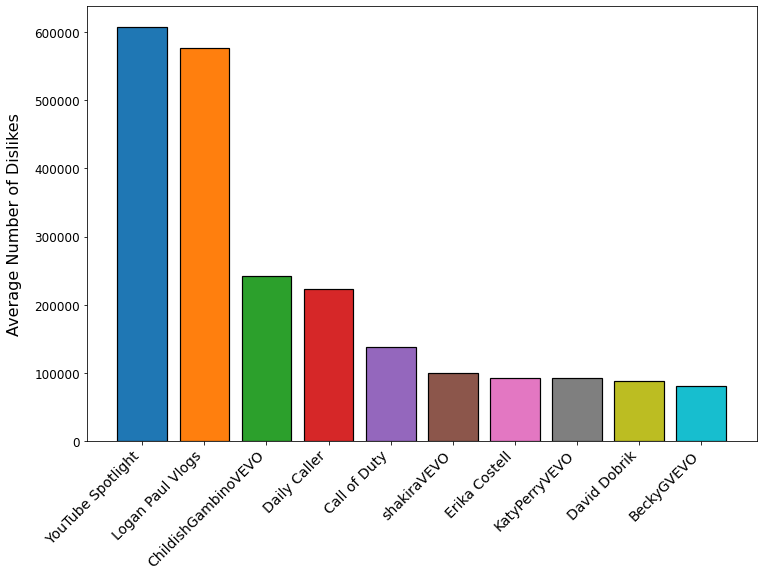

In [29]:
most_disliked = df["dislikes"].groupby(df["channel_title"]).mean().sort_values(ascending=False)
x = most_disliked.index[:10]
y = most_disliked.values[:10]

plt.figure(figsize=(12,8))
plt.xticks(rotation=45, fontsize=14, ha="right")
plt.yticks(fontsize=12)
plt.ylabel("Average Number of Dislikes", fontsize=16, labelpad=12)
plt.bar(x, y, edgecolor="black", linewidth=1.2, color=list(colors))

### As can be seen, YouTube Spotlight and Logan Paul Vlogs are close first and second, while ChildishGambinoVEVO is a far third (less than half the number of dislikes on Logan Paul Videos)
## Channels with the Highest Number of Average Comments across all their Videos

<BarContainer object of 10 artists>

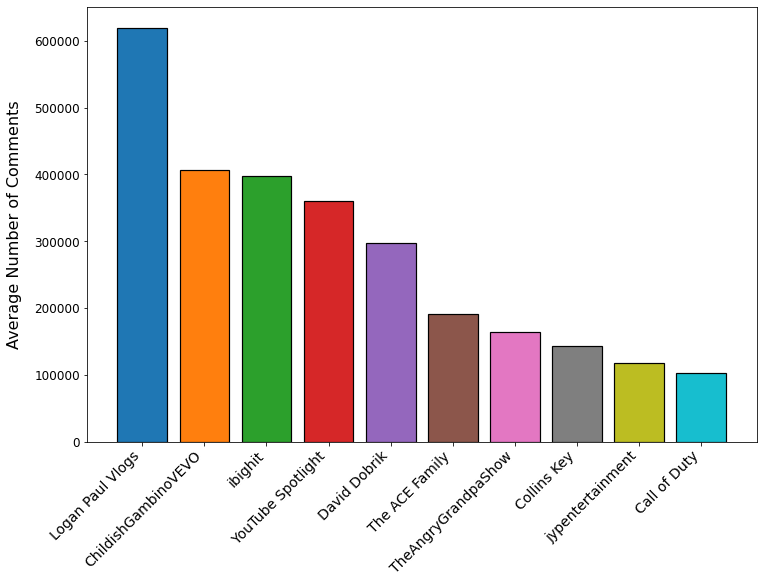

In [30]:
most_comments = df["comment_count"].groupby(df["channel_title"]).mean().sort_values(ascending=False)
x = most_comments.index[:10]
y = most_comments.values[:10]

plt.figure(figsize=(12,8))
plt.xticks(rotation=45, fontsize=14, ha="right")
plt.yticks(fontsize=12)
plt.ylabel("Average Number of Comments", fontsize=16, labelpad=12)
plt.bar(x, y, edgecolor="black", linewidth=1.2, color=list(colors))

### Videos by Logan Paul Vlogs have the most number of comments on average, 50% more than the number of average comments on videos by ChildishGambinoVEVO